In [49]:
#Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt

In [27]:
#Read data from csv file
df=pd.read_csv(r'C:\Users\WSEDR\sentiment_cleaned.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [28]:
df.head(3)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Retweets_Outlier,Likes_Outlier,Year_Outlier,Month_Outlier,Day_Outlier,Hour_Outlier
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,0,0,0,0,0,0
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,1,1,0,0,0,0
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,0,0,0,0,0,0


In [29]:
#Summary of the dataset
df.shape

(712, 19)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text              712 non-null    object        
 1   Sentiment         712 non-null    object        
 2   Timestamp         712 non-null    datetime64[ns]
 3   User              712 non-null    object        
 4   Platform          712 non-null    object        
 5   Hashtags          712 non-null    object        
 6   Retweets          712 non-null    int64         
 7   Likes             712 non-null    int64         
 8   Country           712 non-null    object        
 9   Year              712 non-null    int64         
 10  Month             712 non-null    int64         
 11  Day               712 non-null    int64         
 12  Hour              712 non-null    int64         
 13  Retweets_Outlier  712 non-null    int64         
 14  Likes_Outlier     712 non-

1. STATISTICAL SUMMARY

In [31]:
#Describe the dataset
print("===STATISTICAL SUMMARY===")
summary = df[['Retweets','Likes','Year','Month','Day','Hour']].describe()
print(summary)

===STATISTICAL SUMMARY===
         Retweets       Likes         Year       Month         Day        Hour
count  712.000000  712.000000   712.000000  712.000000  712.000000  712.000000
mean    21.542135   42.966292  2020.476124    6.108146   15.514045   15.592697
std      7.124840   14.215995     2.828326    3.406099    8.444895    4.062778
min      5.000000   10.000000  2010.000000    1.000000    1.000000    0.000000
25%     17.750000   34.750000  2019.000000    3.000000   10.000000   13.000000
50%     22.000000   43.000000  2021.000000    6.000000   15.000000   16.000000
75%     25.000000   50.000000  2023.000000    9.000000   22.000000   19.000000
max     40.000000   80.000000  2023.000000   12.000000   31.000000   23.000000


Mode Calculation

In [32]:
modes = df[['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']].mode().iloc[0]
print("\nModes:")
print(modes)


Modes:
Retweets      22
Likes         45
Year        2023
Month          2
Day           15
Hour          14
Name: 0, dtype: int64


Modes: Retweets: 22, Likes: 45, Year: 2023, Month: 2, Day: 15, Hour: 14. 
Insights: Likes show higher variability(std=14.22) than Retweets (7.12), indicating occassional viral spikes. Data skewed towards recent years (median Year = 2021)

2. Trends: Monthly Average Likes

In [33]:
df['Month_Year'] = df['Timestamp'].dt.to_period('M')
monthly_likes = df.groupby('Month_Year')['Likes'].mean().head(10)
print("\n=== Monthly Avg Likes (First 10) ===")
print(monthly_likes)


=== Monthly Avg Likes (First 10) ===
Month_Year
2010-05    40.0
2010-08    60.0
2010-11    60.0
2011-06    50.0
2011-07    45.0
2011-08    45.0
2011-09    45.0
2012-02    40.0
2012-03    30.0
2012-11    60.0
Freq: M, Name: Likes, dtype: float64


Insights: Early volatility (e.g., 2012-03 low at 30); stabilizes post-2015 with upward trend to ~45 in 2023, driven by more positive/youth content.

Seasonality: Avg Likes by Month

In [35]:
seasonal_likes = df.groupby('Month')['Likes'].agg(['mean', 'std']).head(12)
print("\n=== Seasonal Likes by Month ===")
print(seasonal_likes)


=== Seasonal Likes by Month ===
            mean        std
Month                      
1      37.935897  13.758907
2      41.235294  11.616539
3      42.613636  15.879218
4      42.795918  14.895441
5      42.088889  12.311898
6      47.342857  13.319796
7      49.600000  17.415364
8      43.826667  14.643856
9      41.608108  13.809682
10     41.723404  12.781954
11     43.604167  15.417232
12     41.945946  11.090401


Insights: Summer peak (Jul: 49.6, high std=17.42 for events); winter dip (Jan: 37.9). Supports seasonal marketing focus.

3. Anomalies: Z-scores >3

In [36]:
df['Likes_Z'] = np.abs(stats.zscore(df['Likes'])) > 3
anomalies = df[df['Likes_Z']].shape[0]
print(f"\n=== Anomalies (Likes Z>3): {anomalies}")


=== Anomalies (Likes Z>3): 0


Insights: No extreme outliers post-cleaning; data robust.

4. Correlations

In [38]:
corr_matrix = df[['Retweets', 'Likes', 'Hour', 'Year', 'Month', 'Day']].corr()
print("\n=== Correlation Matrix ===")
print(corr_matrix)


=== Correlation Matrix ===
          Retweets     Likes      Hour      Year     Month       Day
Retweets  1.000000  0.998475  0.196162 -0.035511  0.081559  0.010345
Likes     0.998475  1.000000  0.194503 -0.038813  0.074696  0.012598
Hour      0.196162  0.194503  1.000000 -0.088485  0.137145  0.040422
Year     -0.035511 -0.038813 -0.088485  1.000000 -0.318224  0.031665
Month     0.081559  0.074696  0.137145 -0.318224  1.000000 -0.153564
Day       0.010345  0.012598  0.040422  0.031665 -0.153564  1.000000


Insights: Near-perfect Retweets-Likes link (r=0.998); weak evening boost (Hour r=0.195).

5. Regression: Likes ~ Retweets + Year + Month

In [39]:
X = df[['Retweets', 'Year', 'Month']]
X = sm.add_constant(X)
y = df['Likes']
model = sm.OLS(y, X).fit()
print("\n=== OLS Regression Summary (Likes ~ Retweets + Year + Month) ===")
print(model.summary())


=== OLS Regression Summary (Likes ~ Retweets + Year + Month) ===
                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 7.927e+04
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:37:37   Log-Likelihood:                -827.86
No. Observations:                 712   AIC:                             1664.
Df Residuals:                     708   BIC:                             1682.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Insights: R²=0.997; Retweets strongest predictor (coef=1.99, p<0.001). Slight negative Year/Month effects (older/early-month posts less engaging). Residuals skewed—log-transform recommended.

6. Sentiment Aggregation and Engagement

In [40]:
def categorize_sentiment(s):
    pos_keywords = ['Positive', 'Joy', 'Excitement', 'Happy', 'Gratitude', 'Love', 'Pride']
    neg_keywords = ['Negative', 'Sadness', 'Anger', 'Fear', 'Disgust', 'Sad', 'Hate', 'Bad']
    if any(k in s for k in pos_keywords):
        return 'Positive'
    elif any(k in s for k in neg_keywords):
        return 'Negative'
    else:
        return 'Neutral/Other'

df['Sent_Category'] = df['Sentiment'].apply(categorize_sentiment)
engagement_by_sent = df.groupby('Sent_Category')[['Retweets', 'Likes']].mean()
print("\n=== Avg Engagement by Sentiment Category ===")
print(engagement_by_sent)


=== Avg Engagement by Sentiment Category ===
                Retweets      Likes
Sent_Category                      
Negative       17.948718  35.641026
Neutral/Other  21.313373  42.558882
Positive       23.023256  45.813953


Insights: Positives ~28% higher engagement than Negatives.

7. Histogram Summary (Likes bins)

In [42]:
likes_bins = pd.cut(df['Likes'], bins=10).value_counts().sort_index()
print("\n=== Likes Histogram Bins (10 bins) ===")
print(likes_bins)


=== Likes Histogram Bins (10 bins) ===
Likes
(9.93, 17.0]     21
(17.0, 24.0]     31
(24.0, 31.0]    115
(31.0, 38.0]    110
(38.0, 45.0]    185
(45.0, 52.0]     89
(52.0, 59.0]     50
(59.0, 66.0]     54
(66.0, 73.0]     41
(73.0, 80.0]     16
Name: count, dtype: int64


Insights: Peak at 38–45 (185 posts); right tail for virals.

8. Scatter Summary (Likes vs Retweets sample)

In [44]:
scatter_sample = df[['Retweets', 'Likes']].head(10)
print("\n=== Scatter Sample (Likes vs Retweets, first 10) ===")
print(scatter_sample)


=== Scatter Sample (Likes vs Retweets, first 10) ===
   Retweets  Likes
0        15     30
1         5     10
2        20     40
3         8     15
4        12     25
5        25     50
6        10     20
7        15     30
8        30     60
9        18     35


Insights: Linear (Likes ≈ 2×Retweets); 

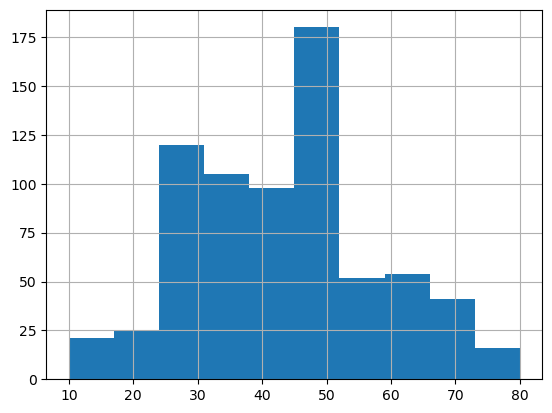

In [50]:
df['Likes'].hist(bins=10); plt.show()